# Title: Prediction Of Loan Eligibility📈

# Import Libraries 📗

In [1]:
#importing the required libraries for the dataset
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')


# Loading the dataset 📂

In [2]:
data=pd.read_csv("loan.csv")
data

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,LP002978,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y
610,LP002979,Male,Yes,3+,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y
611,LP002983,Male,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,Y
612,LP002984,Male,Yes,2,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,Y


# Describing the data

In [3]:
#Finding the  dimensions of data(Row/Columns)
data.shape

(614, 13)

**Conclusion : There are total 614 entries and 13 features**

In [4]:
# Cheking the types and information of the data
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


**Conclusion: There are three datatypes float(4), int(1),and object(8)**

In [7]:
#Summary Statistic for  the numerical data
data.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


# Preprocessing data 💻

In [8]:
#To chceking first n rows of data frame
data.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


**Conclusion : It gives a first 5 rows of dataset**

In [9]:
# Removing the first column from the data.
data.drop(['Loan_ID'],axis=1)

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...,...
609,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y
610,Male,Yes,3+,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y
611,Male,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,Y
612,Male,Yes,2,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,Y


In [10]:
#To finding missing values
data.isna().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [12]:
#filling the missing values for categorical terms - mode
data['Gender'].fillna(data['Gender'].mode()[0],inplace=True)
data['Married'].fillna(data['Married'].mode()[0],inplace=True)
data['Dependents'].fillna(data['Dependents'].mode()[0],inplace=True)
data['Self_Employed'].fillna(data['Self_Employed'].mode()[0],inplace=True)

In [13]:
#filling the missing values for numerical terms - mean
data['LoanAmount'].fillna(data['LoanAmount'].mean() ,inplace=True)
data['Loan_Amount_Term'].fillna(data['Loan_Amount_Term'].mean(),inplace=True)
data['Credit_History'].fillna(data['Credit_History'].mean(),inplace=True)


**Conclusion : Here, we fill a missing values by using mean and mode concepts**

In [14]:
# Removing the missing values from the dataset
data.isna().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

**Conclusion : Hence we removed the missing values in the dataset**

# Exploratory Data Analysis 📊

<AxesSubplot:title={'center':'Loan Status'}, ylabel='Loan_Status'>

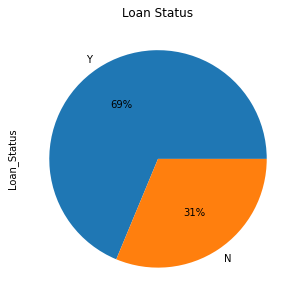

In [16]:
#Univariate Data Analysis :
# Categorical Variables Visualization 
data['Loan_Status'].value_counts(normalize=True).plot.pie(title='Loan Status',autopct='%1.0f%%',figsize=(5,5))

**Conclusion : Here around 69% of applicants have been granted for loan**

<AxesSubplot:xlabel='Gender', ylabel='count'>

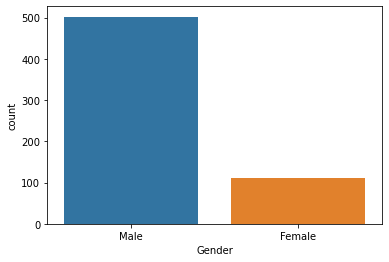

In [17]:
sns.countplot(data['Gender'])

**Conclusion : From the above graph, it is shown that the number of male applicants are more than female applicants**

<AxesSubplot:xlabel='Married', ylabel='count'>

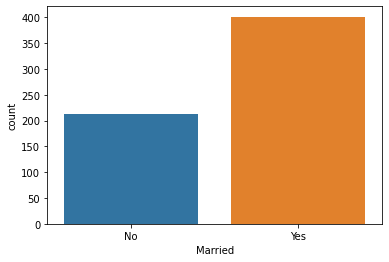

In [18]:
sns.countplot(data['Married'])

**Conclusion : From the above graph, it is shown that the most of the applicants are married**

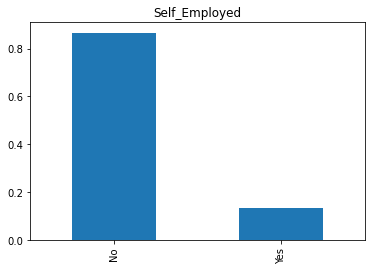

In [19]:
data['Self_Employed'].value_counts(normalize=True).plot.bar(title='Self_Employed')
plt.show()

 **Conclusion :Around 15% of applicants in the dataset are self-employed.**

In [20]:
#Dependent column values
data['Dependents'].value_counts()

0     360
1     102
2     101
3+     51
Name: Dependents, dtype: int64

In [21]:
#replacing the value of 3+ to 4
data=data.replace(to_replace='3+',value=4)
data['Dependents'].value_counts()

0    360
1    102
2    101
4     51
Name: Dependents, dtype: int64

<AxesSubplot:xlabel='Dependents', ylabel='count'>

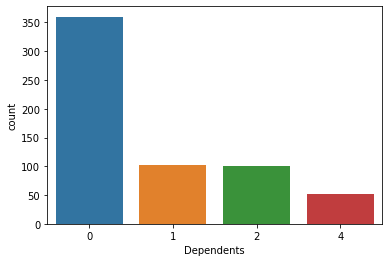

In [22]:
sns.countplot(data['Dependents'])

**Conclusion : Most of the applicants don't have any dependents.**

<AxesSubplot:xlabel='Property_Area', ylabel='count'>

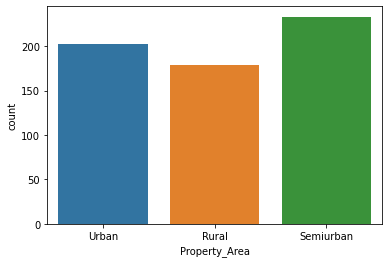

In [23]:
sns.countplot(data['Property_Area'])

**Conclusion : Here maximumum number of applicants are from semiurban and urban areas.**

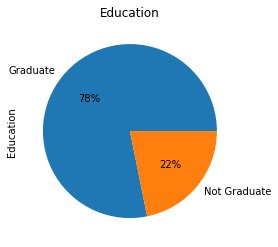

In [24]:
data['Education'].value_counts(normalize=True).plot.pie(title='Education',autopct='%1.0f%%')
plt.show()

**Conclusion :  Here, around 78% of the applicants are Graduate.** 

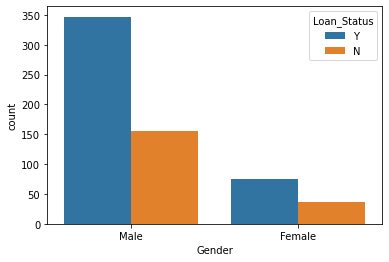

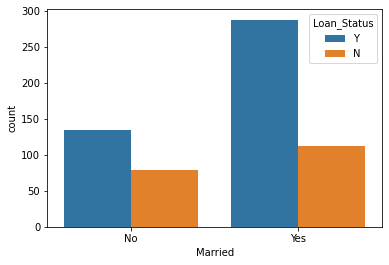

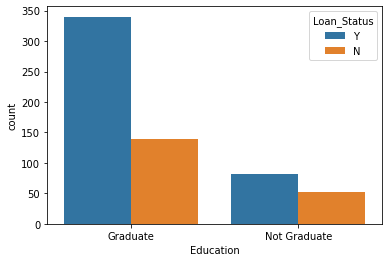

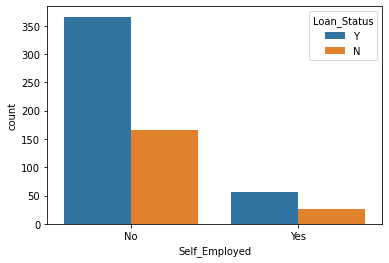

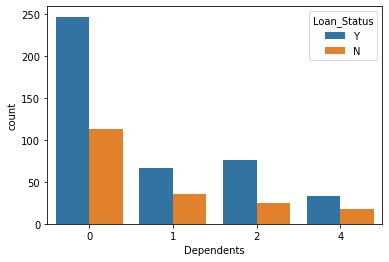

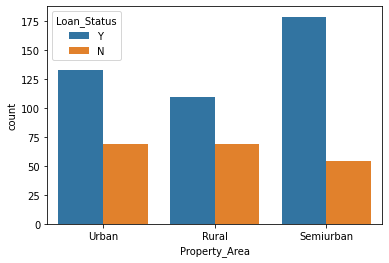

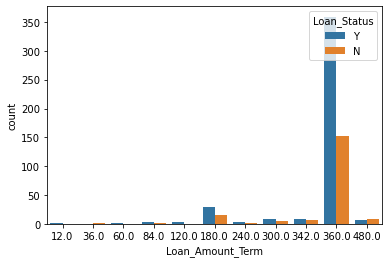

In [26]:
#Bivariate Analysis
#Categorical vs Target Variable
sns.countplot(data['Gender'],hue=data['Loan_Status'])
plt.show()
sns.countplot(data['Married'],hue=data['Loan_Status'])
plt.show()
sns.countplot(data['Education'],hue=data['Loan_Status'])
plt.show()
sns.countplot(data['Self_Employed'],hue=data['Loan_Status'])
plt.show()
sns.countplot(data['Dependents'],hue=data['Loan_Status'])
plt.show()
sns.countplot(data['Property_Area'],hue=data['Loan_Status'])
plt.show()
sns.countplot(data['Loan_Amount_Term'],hue=data['Loan_Status'])
plt.show()

**Conclusion : From the above graphs it is shown that Males are getting aproved for loan more than females. Married applicants have more chances to granted loans. The people with no dependency have more chances of getting the loan.The majority of the applicants belongs from the Semi-Urban areas for granting loans. And loan has been taken are for 360 days.**   

<AxesSubplot:>

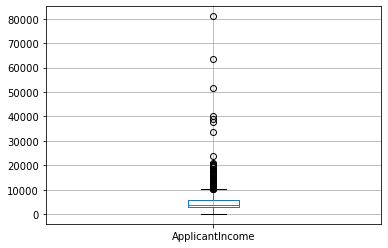

In [27]:
#Numerical Variables Visualization
#plotting Boxplot
data.boxplot(column='ApplicantIncome')#plotting Histogram


<AxesSubplot:>

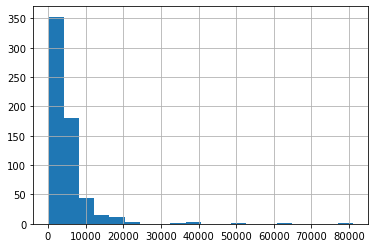

In [28]:
#plotting Histogram
data['ApplicantIncome'].hist(bins=20)

**Conclusion : Here, the distribution of Applicant Income is positively skewed it has an outliers which are shown in above boxplot.** 

<AxesSubplot:>

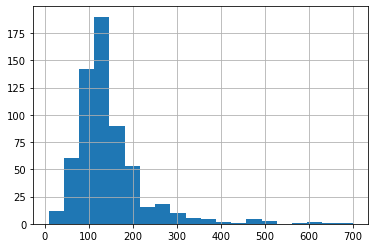

In [29]:
data['LoanAmount'].hist(bins=20)

# Converting Categorical Variables to Numeric

In [30]:
#Converting categorical variables into numerical values
data.replace({"Married":{'No':0,'Yes':1}},inplace=True)
data.replace({"Gender":{'Male':1,'Female':0},"Self_Employed":{'No':0,'Yes':1},"Property_Area":{'Rural':0,'Semiurban':1,'Urban':2},"Education":{'Graduate':1,'Not Graduate':0}},inplace=True)
data.replace({"Loan_Status":{'N':0,'Y':1}},inplace=True)

In [31]:
#Changing categorical variables into numeric
data.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,1,0,0,1,0,5849,0.0,146.412162,360.0,1.0,2,1
1,LP001003,1,1,1,1,0,4583,1508.0,128.000000,360.0,1.0,0,0
2,LP001005,1,1,0,1,1,3000,0.0,66.000000,360.0,1.0,2,1
3,LP001006,1,1,0,0,0,2583,2358.0,120.000000,360.0,1.0,2,1
4,LP001008,1,0,0,1,0,6000,0.0,141.000000,360.0,1.0,2,1


# Correlation Matrix

In [33]:
#Correlation Table
corr=data.corr()
corr

,Gender,Married,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
Gender,1.000000,0.364569,-0.045364,-0.000525,0.058809,0.082912,0.107930,-0.073567,0.012819,-0.025752,0.017987
Married,0.364569,1.000000,-0.012304,0.004489,0.051708,0.075948,0.147141,-0.100863,0.005852,0.004257,0.091478
Education,-0.045364,-0.012304,1.000000,0.010383,0.140760,0.062290,0.166998,0.077242,0.077936,0.065243,0.085884
Self_Employed,-0.000525,0.004489,0.010383,1.000000,0.127180,-0.016100,0.115260,-0.033943,-0.002260,-0.030860,-0.003700
ApplicantIncome,0.058809,0.051708,0.140760,0.127180,1.000000,-0.116605,0.565620,-0.045242,-0.014477,-0.009500,-0.004710
CoapplicantIncome,0.082912,0.075948,0.062290,-0.016100,-0.116605,1.000000,0.187828,-0.059675,-0.001665,0.010522,-0.059187
LoanAmount,0.107930,0.147141,0.166998,0.115260,0.565620,0.187828,1.000000,0.038801,-0.007738,-0.044776,-0.036416
Loan_Amount_Term,-0.073567,-0.100863,0.077242,-0.033943,-0.045242,-0.059675,0.038801,1.000000,0.001395,-0.077620,-0.020974
Credit_History,0.012819,0.005852,0.077936,-0.002260,-0.014477,-0.001665,-0.007738,0.001395,1.000000,-0.001880,0.540483
Property_Area,-0.025752,0.004257,0.065243,-0.030860,-0.009500,0.010522,-0.044776,-0.077620,-0.001880,1.000000,0.032112


**Conclusion : Here, each cell in the table represents the correlation between two variables.**

<AxesSubplot:>

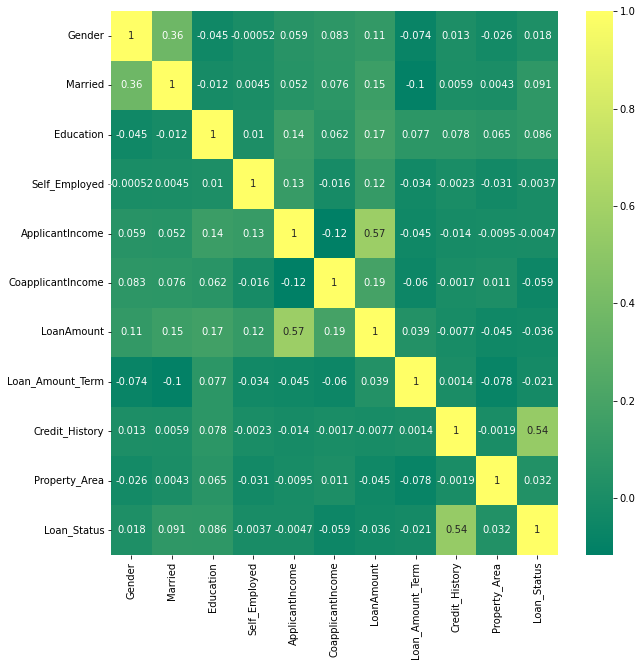

In [37]:
#plotting Correlation Matrix
corr=data.corr()
plt.figure(figsize=(10,10))
sns.heatmap(corr, annot = True, cmap='summer')


**Conclusion : We can  clearly see that 1.Credit_History and Loan_Status are correlated with each other(positively correlated) 2.Also LoanAmount and ApplicantIncome are corrleated with each other(positively corr). Therefore our target value is highly dependant on this this two crieterias.**

# Machine learning models
Here, we will divide our dataset into two variables X as the Crieteria we defined earlier and Y as the Loan_Status the target value we want to predict.

Models we will use:


1.Logistic Regression

2.Decision Tree

3.Support Vector Machine



In [42]:
#feature extraction
x=data.iloc[:,1:12]
y=data.iloc[:,-1]

In [33]:
x

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,1,0,0,1,0,5849,0.0,146.412162,360.0,1.0,2
1,1,1,1,1,0,4583,1508.0,128.000000,360.0,1.0,0
2,1,1,0,1,1,3000,0.0,66.000000,360.0,1.0,2
3,1,1,0,0,0,2583,2358.0,120.000000,360.0,1.0,2
4,1,0,0,1,0,6000,0.0,141.000000,360.0,1.0,2
...,...,...,...,...,...,...,...,...,...,...,...
609,0,0,0,1,0,2900,0.0,71.000000,360.0,1.0,0
610,1,1,4,1,0,4106,0.0,40.000000,180.0,1.0,0
611,1,1,1,1,0,8072,240.0,253.000000,360.0,1.0,2
612,1,1,2,1,0,7583,0.0,187.000000,360.0,1.0,2


In [34]:
y

0      1
1      0
2      1
3      1
4      1
      ..
609    1
610    1
611    1
612    1
613    0
Name: Loan_Status, Length: 614, dtype: int64

# Splitting the data into train and test dataset

In [35]:
#getting into training /testing data
from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest=train_test_split(x,y,test_size=0.30)

# Building a Models

# Logistic Regression:
1.Logistic regression is one of the most popular Machine Learning algorithms, which comes under the Supervised Learning technique.

2.It is used for predicting the probability of a categorical dependent variable using a given set of independent variables. 

3.Here, our target variable is Bimodal, means output are in the form of 2 possible types like 'Yes' or 'No' ,'0' or '1', 'Pass' or 'Fail' etc. 

In [36]:
#To build a algorithm
from sklearn.linear_model import LogisticRegression
model=LogisticRegression()
model

LogisticRegression()

In [37]:
#To check model is fitting or not
model.fit(xtrain,ytrain)

LogisticRegression()

In [38]:
#Prediction of model
predicted=model.predict(xtest)
predicted

array([0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1,
       1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0,
       1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1,
       1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1], dtype=int64)

In [39]:
predicted.shape

(185,)

In [40]:
#checking accuracy score on training data
model.score(xtrain,ytrain)

0.8088578088578089

In [41]:
#checking accurachy score for testing data
model.score(xtest,ytest)

0.8108108108108109

In [42]:
#Confusion Matrix
from sklearn.metrics import *
print(confusion_matrix(ytest,predicted))
print(classification_report(ytest,predicted))

[[ 29  31]
 [  4 121]]
              precision    recall  f1-score   support

           0       0.88      0.48      0.62        60
           1       0.80      0.97      0.87       125

    accuracy                           0.81       185
   macro avg       0.84      0.73      0.75       185
weighted avg       0.82      0.81      0.79       185



**Here, the accuracy score of Logistic regression model is 81%**

# Decision Tree Classification:
 Decision tree is the most powerful and popular tool for classification and prediction. A Decision tree is a flowchart like tree structure.

In [43]:
#To build a algorithm
from sklearn.tree import DecisionTreeClassifier
model= DecisionTreeClassifier()

In [44]:
#To check model is fitting or not
model.fit(xtrain,ytrain)

DecisionTreeClassifier()

In [45]:
#Prediction of model
result=model.predict(xtest)
result

array([0, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0,
       0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1,
       1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1,
       1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0,
       1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0,
       1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1,
       1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 0, 0, 0, 1, 1, 1, 1, 1], dtype=int64)

In [46]:
#checking accuracy score on training data
model.score(xtrain,ytrain)

1.0

In [47]:
#checking accuracy score on testing data
model.score(xtest,ytest)

0.7513513513513513

In [48]:
#Confusion Matrix
from sklearn.metrics import *
print(confusion_matrix(ytest,result))

[[ 39  21]
 [ 25 100]]


In [49]:
print(classification_report(ytest,result))

              precision    recall  f1-score   support

           0       0.61      0.65      0.63        60
           1       0.83      0.80      0.81       125

    accuracy                           0.75       185
   macro avg       0.72      0.73      0.72       185
weighted avg       0.76      0.75      0.75       185



The accuracy score of decision tree classifier is 75 % 

# Support Vector Machine :
1.SVM a Supervised Learning algorithms, which is used for Classification as well as Regression problems.

2.The objective of SVM algorithm is to find a hyperplane in an N-dimensional space that distinctly classifies the data points.

In [50]:
from sklearn.svm import SVC
model=SVC(kernel='linear')

In [51]:
#To check model is fitting or not
model.fit(xtrain,ytrain)

SVC(kernel='linear')

In [52]:
#prediction of a Model
result=model.predict(xtest)
result

array([1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0,
       1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 1], dtype=int64)

In [53]:
#checking accuracy score on training data
model.score(xtrain,ytrain)

0.7902097902097902

In [54]:
#checking accuracy score on testing data
model.score(xtest,ytest)

0.7567567567567568

In [55]:
#Confusion Matrix
from sklearn.metrics import *
print(confusion_matrix(ytest,result))

[[ 20  40]
 [  5 120]]


In [56]:
print(classification_report(ytest,result))

              precision    recall  f1-score   support

           0       0.80      0.33      0.47        60
           1       0.75      0.96      0.84       125

    accuracy                           0.76       185
   macro avg       0.78      0.65      0.66       185
weighted avg       0.77      0.76      0.72       185



**Conclusuion :Here, The accuracy score of SVM is also 75 %. Thus , Logistic regression is good fit for this data with maximum accuracy score is (81%)**